# 손실함수
## - 오차제곱합

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [.1,.05,.6,.0,.05,.1,.0,.1,.0,.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [.1,.05,.6,.0,.05,.1,.0,.1,.0,.0]

cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [7]:
y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## - 미니배치학습
훈련데이터 중 일부를 무작위로 가져옴

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

In [9]:
(x_train, t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) 
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
t_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
np.random.choice(60000,10) 

array([ 3993, 16983, 47914, 19892, 55586, 40569,  8984,  6299, 12251,
       50820])

## - 교차 엔트로피 오차

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+1e-7))/batch_size

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

# 수치 미분

In [15]:
import matplotlib.pylab as plt

In [16]:
#중심 차분을 사용 x와 x+h 의 차분이 아닌 x-h와 x+h 의 차분을 말함
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [17]:
#y = 0.01x^2 + 0.1x 함수
def function_1(x):
    return 0.01* x ** 2 + 0.1 * x

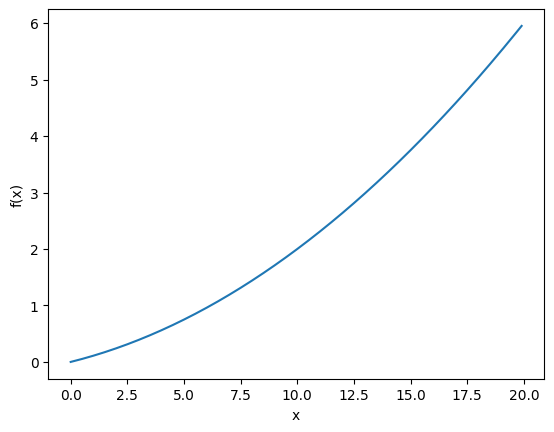

In [18]:
x = np.arange(.0, 20.0, .1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


# 수치미분 함수 구현 

0.1999999999990898


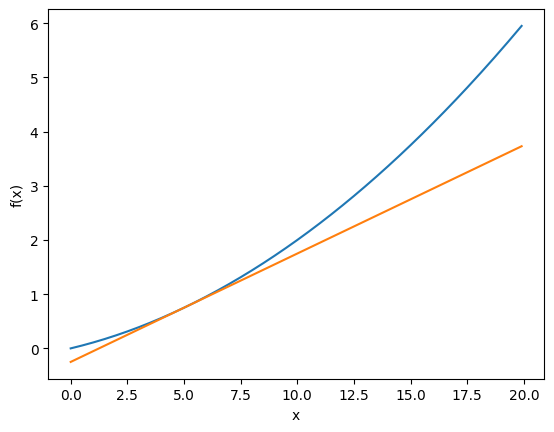

In [20]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 편미분
function_tmp1(x0)
x0 = 3, x1=4일 때, x0에 대한 편미분을 구하여성

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [22]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

# 기울기

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [24]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        temp_val = x[idx]

        x[idx] = temp_val + h
        fxh1 = f(x)

        x[idx] = temp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = temp_val
    return grad

In [25]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

# 경사하강법

In [26]:
def gradient_descent(f, init_x, lr = 0.01, setp_num=100):
    x = init_x
    
    for i in range(setp_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [27]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, setp_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
#학습률(하이퍼파라미터)이 너무 큰 예시 lr = 10, 값이 완전히 발산
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, setp_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
#학습률이 너무 작은 예시 lr = 1e-10, 값이 거의 갱신되지 않음
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, setp_num = 100)

array([-2.99999994,  3.99999992])

# 경사하강법 구현

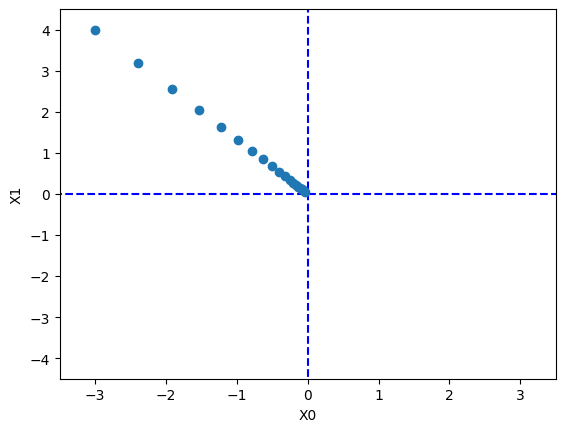

In [30]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 신경망에서의 기울기
- softmax : 활성화 함수 
- cross_entropy_error : 교차 엔트로피 오차 함수

In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error #common안 functions 모듈에서 softmax함수와, cross_entropy_error 함수 임포트
from common.gradient import numerical_gradient #common안 gradient 모듈에서 numerical_gradient함수 임포트

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [32]:
net = simpleNet()
net.W

array([[ 0.882843  ,  0.21269199,  1.34996935],
       [-0.4361053 ,  0.30587761,  0.64387263]])

In [33]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([0.13721103, 0.40290504, 1.38946698])

# 학습 알고리즘 구현하기
- params : 가중치 매개변수(ex. key 'W1' 은 1번 레이어의 가중치 key 'b1' 은 1번 레이어의 편향 정보를 가짐)
- grads : params 변수와 대응되는 매개변수의 기울기 값 (params의 key와 같은 이름으로 가중치의 기울기를 가짐)

In [34]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot (x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot (z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])   
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [35]:
#params을 직접 확인
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


# train_neuralnet

In [ ]:
import sys, os
sys.path.append("C:/Users/sj123/Doit_DeepLearning/2025_딥러닝_전선")
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 100 
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    
    grad = network.numerical_gradient(x_batch, t_batch)
    

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()